<a href="https://colab.research.google.com/github/ktichola/ML-and-DL-to-Gravitational-waves-analysis/blob/main/%CE%91%CE%BD%CF%84%CE%AF%CE%B3%CF%81%CE%B1%CF%86%CE%BF_Pulsars_and_the_Little_Green_Men.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'playground-series-s3e10:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F47789%2F5148345%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240505%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240505T113042Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D31481c65f21d9a9a8cf75e94910489ec0edfaa9afb5690316ec1a7e387626fac13f2f2692d87496744f5156510b438e2b8ace47d2ba143dd0c560620bfe5c68800bda69de5e52995701983444c645c9107fe675c7a42641e4c9c1c8faa4d4fb03b226ed112bfb54703ea0730015fc731c26b66bd064be81fe37d1b81cbd6ef0f5aaf0436e61cdf7426a504762c674aa93762a1c25db34374dbb70847f1c5d5861e82f10bc21be83898e3cea2f395ecb3b01f1ab5a4aebd3eb0d3ed634e1c6dc91e508eb5f9f76bffe55cddfb9410f321e8ca4cc3704f0577dc19a47a86e56a163b0c9d6c6cc5f6682bbbd0c32b04d74b94722ea735210005c8689d87a0bb74e8'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


Published on 07 March, 2023 by Marília Prata, mpwolke

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

import plotly
plotly.offline.init_notebook_mode(connected=True)

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e10/sample_submission.csv
/kaggle/input/playground-series-s3e10/train.csv
/kaggle/input/playground-series-s3e10/test.csv


"Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter. Machine learning tools are now being used to automatically label pulsar candidates to facilitate rapid analysis. Classification systems in particular are being widely adopted,which treat the candidate data sets as binary classification problems."

https://www.kaggle.com/datasets/colearninglounge/predicting-pulsar-starintermediate

#Citation

@misc{playground-series-s3e10,

    author = {Ashley Chow, inversion},
    
    title = {Playground Series - Season 3, Episode 10},
    
    publisher = {Kaggle},
    
    year = {2023},
    
    url = {https://kaggle.com/competitions/playground-series-s3e10}
}

<iframe width="624" height="351" src="https://www.youtube.com/embed/gjLk_72V9Bw" title="NASA | What is a Pulsar?" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

In [ ]:
#By Marina Shut  https://www.kaggle.com/code/marshuu/svm-kernel-rbf-classification-salaries

from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Show code</button>''', raw=True)

Show code

 #Machine Learning to Categorize Radio Pulsar Candidates

 Application of machine learning methods to identify and categorize
radio pulsar signal candidates

Authors: Serena Debesai, Carmen Gutierrez, and Nazli Ugur Koyluoglu -
June 12, 2020

 "A pulsar star is a high mass star that collapses into a neutron star and spins increasingly rapidly, emitting intense electromagnetic radiation. The beams of energy emitted by the pulsar star are detected as radio waves by our
telescopes."

"Their unique integrated electromagnetic radiation profile and strongly periodic received signal allows for classification and flagging of pulsars from a set of noise and Radio Frequency Interference (RFI) signals. However, radio pulsar surveys produce many more pulsar candidate signals than can be inspected by human experts by hand. Here, the authors investigated the application of various machine learning methods to the problem of automatic pulsar identification."

http://cs229.stanford.edu/proj2020spr/report/Debesai_Gutierrez_Koyluoglu.pdf

#Pulsars

"Intriguing, precisely repeated radio pulses from the plane of our galaxy were discovered in the late 1960's and half-seriously attributed to "little green men" and called LGMs. By a process of elimination and modeling, these periodic sources, called pulsars, are attributed to rotating neutron stars which emit lighthouse type sweeping beams as they rotate."

http://hyperphysics.phy-astr.gsu.edu/hbase/Astro/pulsar.html

http://hyperphysics.phy-astr.gsu.edu/hbase/Astro/pulsar.html

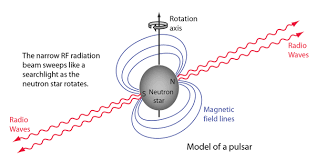

In [ ]:
train = pd.read_csv("/kaggle/input/playground-series-s3e10/train.csv")
train.head()

,id,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
0,0,133.171875,59.716081,0.043133,-0.703383,54.917224,70.084438,0.749798,-0.649512,0
1,1,87.093750,36.257973,0.435469,2.266057,3.417224,21.865069,7.039330,52.686251,0
2,2,112.640625,39.818393,0.379639,0.922306,2.730769,15.689690,8.193471,85.649785,0
3,3,120.679688,45.918448,-0.098490,0.011775,2.696488,20.954662,8.183874,70.332899,0
4,4,134.070312,57.720107,-0.107772,-0.573335,1.107860,11.255051,16.107748,308.753765,0


#Kaggle Playground is so friendly: No Missing Values as always

In [ ]:
train.isnull().sum()

id                      0
Mean_Integrated         0
SD                      0
EK                      0
Skewness                0
Mean_DMSNR_Curve        0
SD_DMSNR_Curve          0
EK_DMSNR_Curve          0
Skewness_DMSNR_Curve    0
Class                   0
dtype: int64

In [ ]:
train.columns = ['id','Mean_Integrated', 'SD', 'EK', 'Skewness', 'Mean_DMSNR_Curve',
               'SD_DMSNR_Curve', 'EK_DMSNR_Curve', 'Skewness_DMSNR_Curve', 'Class']

In [ ]:
train["Class"].value_counts()

0    106597
1     10967
Name: Class, dtype: int64

In [ ]:
train.groupby(by="Class").agg(["min","mean","max"])

id                       Mean_Integrated                          \
      min          mean     max             min        mean         max   
Class                                                                     
0       0  58736.196009  117563        6.265625  117.549674  189.367188   
1      15  59221.845537  117558        6.054688   50.000228  177.335938   

              SD                              EK  ... Mean_DMSNR_Curve  \
             min       mean        max       min  ...              max   
Class                                             ...                    
0      27.519981  47.738898  93.602933 -1.730782  ...       217.371238   
1      24.783273  36.747219  75.917640 -1.707789  ...       200.458194   

      SD_DMSNR_Curve                        EK_DMSNR_Curve            \
                 min       mean         max            min      mean   
Class                                                                  
0           7.370432  22.670474  109.890785      -2.597872  8.641474   
1           7.804609  60.406346  109.251171      -2.018626  2.166876   

                 Skewness_DMSNR_Curve                           
             max                  min        mean          max  
Class                                                           
0      34.539844            -1.976976  102.628848  1191.000837  
1      27.461427            -1.936212    8.854512   849.382623  

[2 rows x 27 columns]

In [ ]:
train1 = train.groupby('Class')[['Mean_Integrated', 'SD', 'EK', 'Skewness', 'Mean_DMSNR_Curve',
               'SD_DMSNR_Curve', 'EK_DMSNR_Curve', 'Skewness_DMSNR_Curve']].mean().reset_index()

train1= train1.transpose().reset_index()
train1.columns = ['features', 'Not Pulsar Star', 'Pulsar Star']

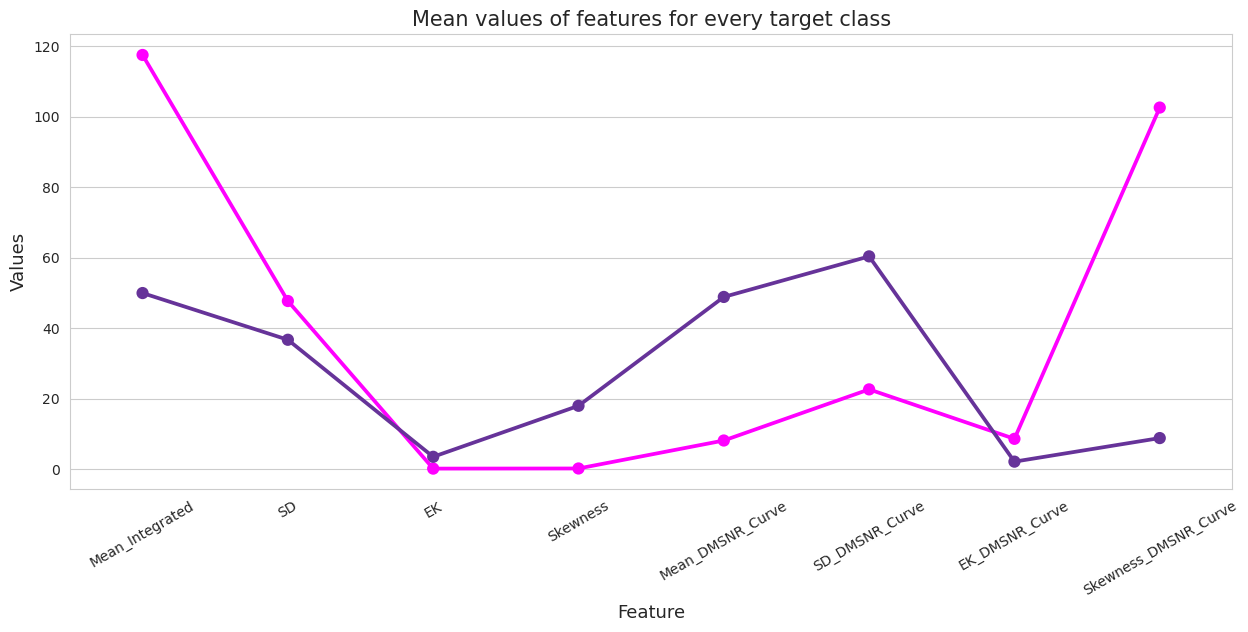

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,13))
plt.subplot(211)
vis2=sns.pointplot(data=train1.iloc[1:], x='features', y='Not Pulsar Star',color='#FF00FF', label='Not Pulsar Star')
vis3=sns.pointplot(data=train1.iloc[1:], x='features', y='Pulsar Star', color='#663399', label='Pulsar Star')

plt.title('Mean values of features for every target class', fontsize=15)
plt.xlabel('Feature', fontsize=13)
plt.ylabel('Values', fontsize=13)
plt.xticks(rotation=30);

In [ ]:
pulsar = train[train['Class'] ==1]
pulsar_count = pulsar["Class"].value_counts()[1]
not_pulsar = train[train['Class'] == 0]
not_pulsar_count = not_pulsar["Class"].value_counts()[0]

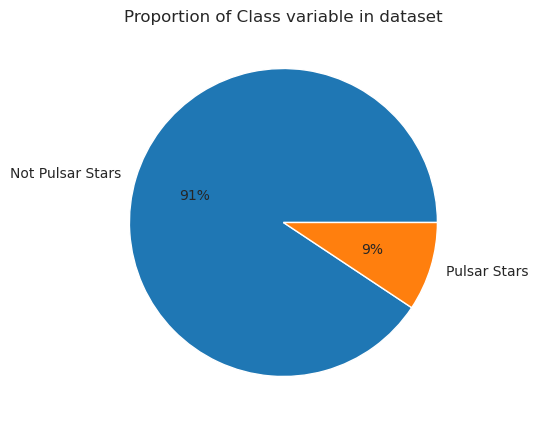

There are 10967 signals that belong to Pulsar Stars and 106597 signals that aren't from Pulsars.


In [ ]:
#pie plotting the stats between pulsars and not pulsars
plt.figure(figsize=(5,5))
plt.pie(train["Class"].value_counts().values,labels=["Not Pulsar Stars","Pulsar Stars"], autopct="%1.0f%%")
plt.title("Proportion of Class variable in dataset")
plt.show()
print("There are " + str(pulsar_count) + " signals that belong to Pulsar Stars "
      + "and " + str(not_pulsar_count) + " signals that aren't from Pulsars.")

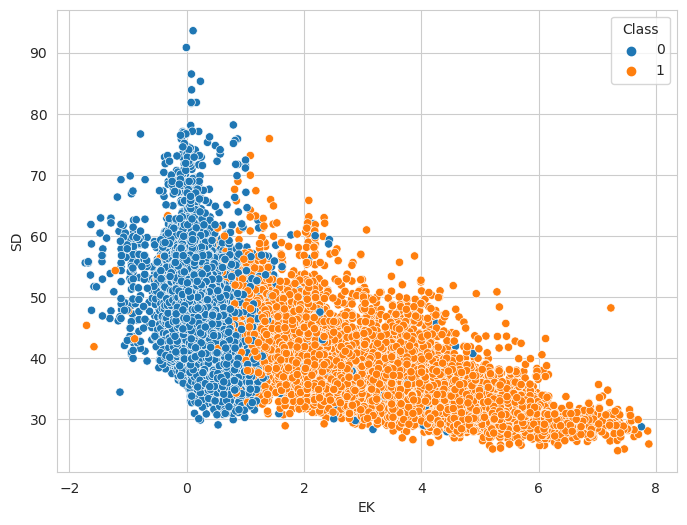

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=train['EK'], y=train['SD'], hue=train['Class']);

<Figure size 2500x2500 with 0 Axes>

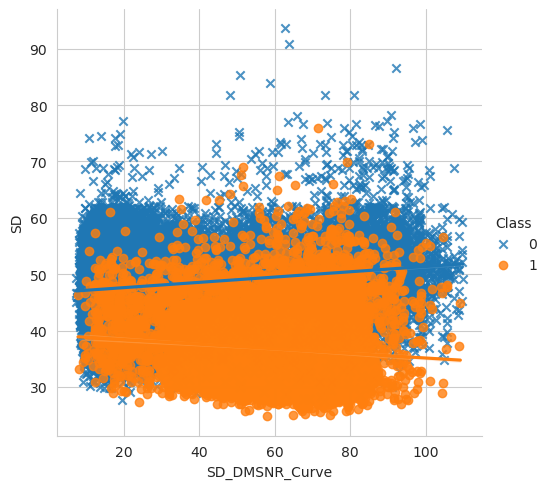

In [ ]:
plt.figure(figsize=(25,25))
sns.lmplot(x="SD_DMSNR_Curve", y="SD", hue="Class", data=train,  markers=["x", "o"]);

In [ ]:
y=train.Class.values
x_data=train.drop(["Class"], axis=1)
train.dropna(inplace=True)
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data) )
from sklearn.model_selection import train_test_split

x_train, x_test, y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=42)

#Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
print(lr.score(x_test,y_test))
print(lr.score(x_train,y_train))

0.7989304460852177
0.7997059301586743


#Ridge

In [ ]:
from sklearn.linear_model import Ridge
ridge= Ridge().fit(x_train,y_train)
print(ridge.score(x_test,y_test))
print(ridge.score(x_train,y_train))

0.7986344992550971
0.7994911336131447


#What is the difference between those two Ridges snippets?

The original author didn't mentioned

In [ ]:
ridge01=Ridge(alpha=0.1).fit(x_train,y_train)
print(ridge01.score(x_train,y_train))
print(ridge01.score(x_test,y_test))

0.7997034952708004
0.7989194716371211


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=7,weights="distance")

knn_model.fit(x_train,y_train)

y_head_knn = knn_model.predict(x_test)

knn_score = knn_model.score(x_test,y_test)

knn_score

0.9889991494187695

Maximum KNN score 98.89%


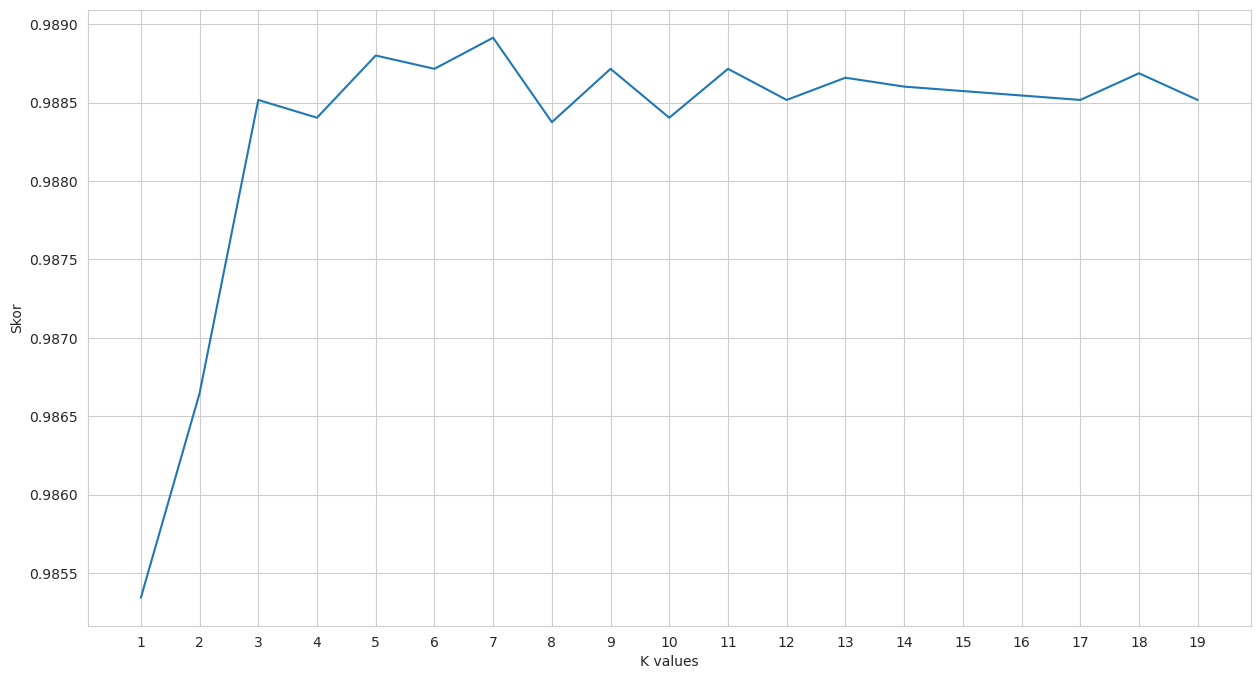

In [ ]:
sns.set_style("whitegrid")
knn_score_list = []
for i in range(1,20):
    knn_2 = KNeighborsClassifier(n_neighbors = i)
    knn_2.fit(x_train, y_train)
    knn_score_list.append(knn_2.score(x_test, y_test))

plt.figure(figsize=(15,8))
plt.plot(range(1,20), knn_score_list)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K values")
plt.ylabel("Skor")

knn_acc_2_max = max(knn_score_list)*100
print("Maximum KNN score {:.2f}%".format(knn_acc_2_max))

In [ ]:
train_accuracy=[]
test_accuracy=[]
neighborhood_numbers=range(1,11)

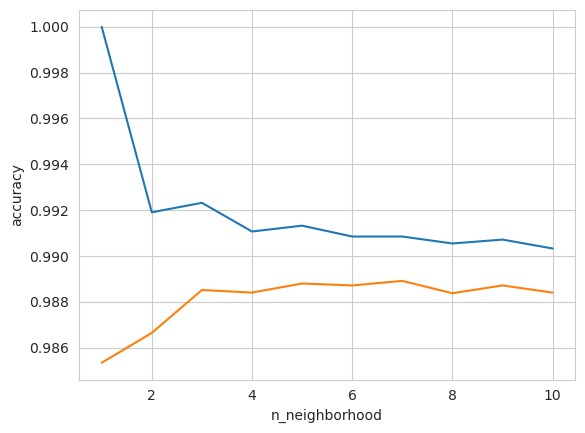

In [ ]:
sns.set_style("whitegrid")
for n_neighborhood in neighborhood_numbers:
    snf=KNeighborsClassifier(n_neighbors=n_neighborhood)
    snf.fit(x_train,y_train)
    train_accuracy.append(snf.score(x_train,y_train))
    test_accuracy.append(snf.score(x_test,y_test))

plt.plot(neighborhood_numbers,train_accuracy,label='train accuracy')
plt.plot(neighborhood_numbers,test_accuracy,label='test accuracy')
plt.ylabel('accuracy')
plt.xlabel('n_neighborhood');

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
print(tree.score(x_train,y_train))
print(tree.score(x_test,y_test))

1.0
0.9847178905585483


In [ ]:
tree=DecisionTreeClassifier(max_depth=4)
tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
print(tree.score(x_train,y_train))
print(tree.score(x_test,y_test))

0.9912265778793108
0.9899347887723278


In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=100).fit(x_train,y_train)
print(forest.score(x_test,y_test))

0.9901616104337965


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt=GradientBoostingClassifier(learning_rate=0.01,random_state=0).fit(x_train,y_train)

In [ ]:
print(gbrt.score(x_train,y_train))
print(gbrt.score(x_test,y_test))

0.9906311517243055
0.9898497306492771


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=150, random_state=1)
rf.fit(x_train,y_train)
print("Score for Random Forest {}".format(rf.score(x_test,y_test)))

Score for Random Forest 0.9902183158491636


In [ ]:
y_prediction=rf.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_prediction)
cm

array([[31871,   105],
       [  240,  3054]])

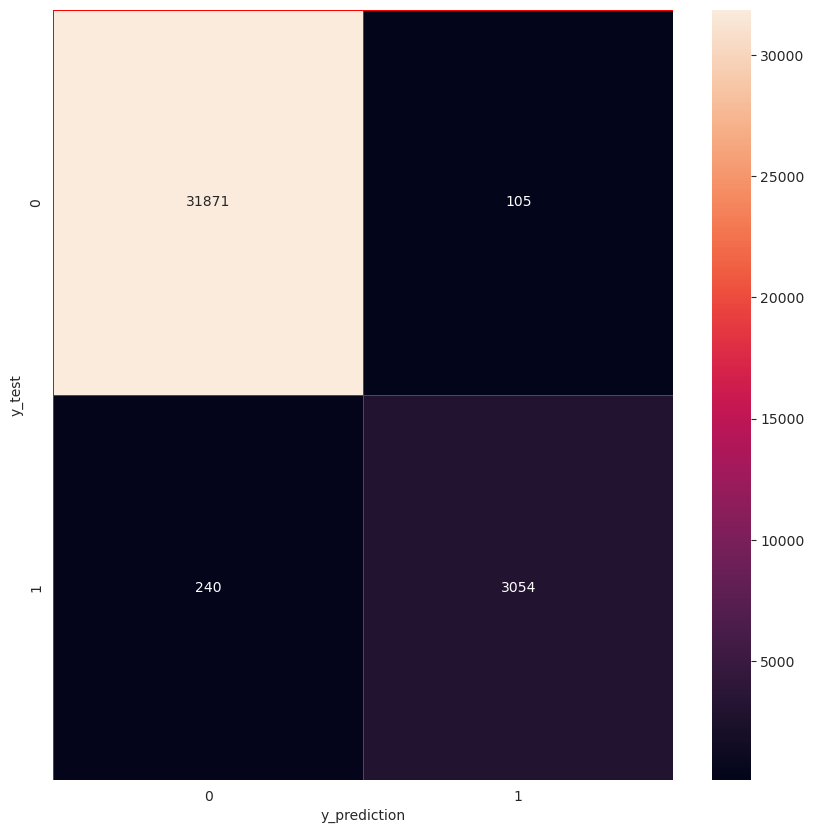

In [ ]:
f, ax=plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_test")
plt.show()

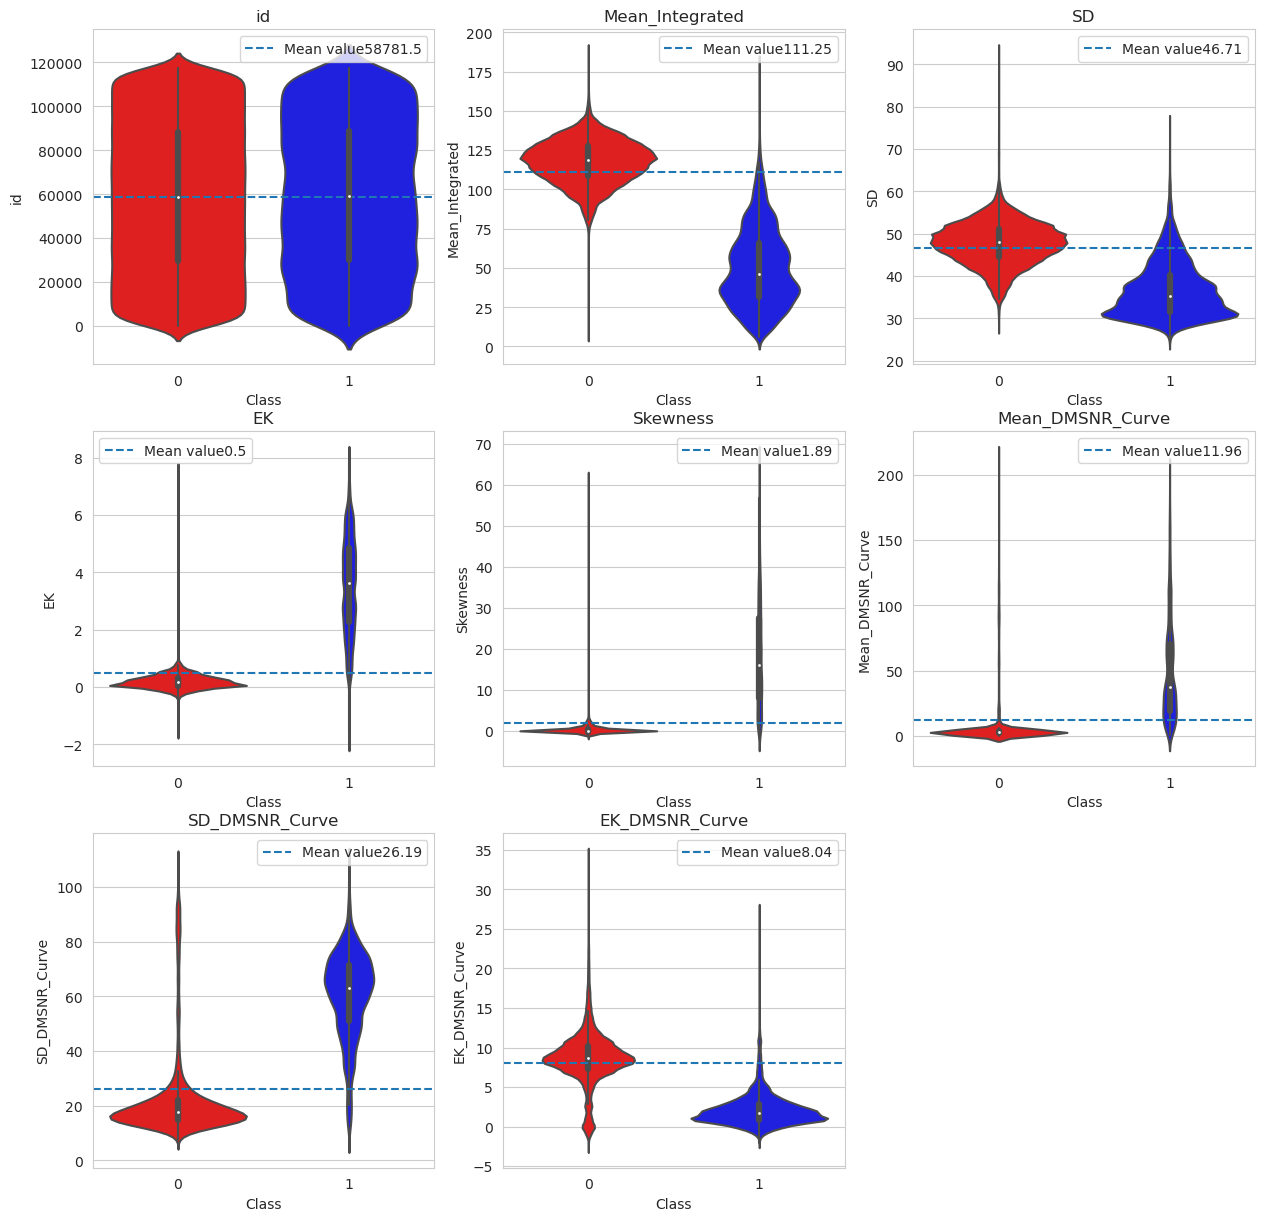

In [ ]:
features = train.iloc[:,0:8]
plt.figure(figsize=(15,20))
j = 0
for i in features:
    plt.subplot(4,3,j+1)
    sns.violinplot(x=train["Class"],y=train[i],palette=["red","blue"])
    plt.title(i)
    plt.axhline(train[i].mean(),linestyle = "dashed", label ="Mean value" + str(round(train[i].mean(), 2)))
    plt.legend(loc="best")
    j = j + 1

#Ortalama değer = Mean/average value

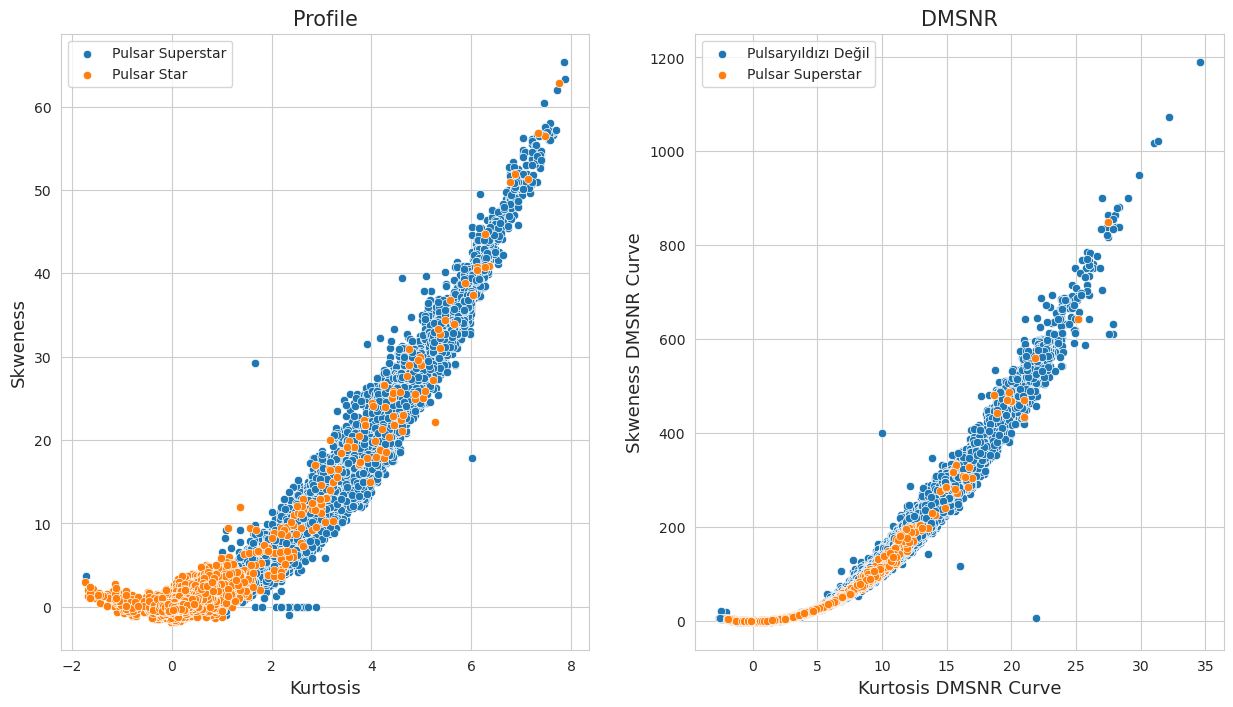

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(121)
sns.scatterplot(data=train[train['Class']==1], x='EK', y='Skewness', label='Pulsar Superstar')
sns.scatterplot(data=train[train['Class']==0], x='EK', y='Skewness', label='Pulsar Star')
plt.title('Profile', fontsize=15)
plt.xlabel('Kurtosis', fontsize=13)
plt.ylabel('Skweness', fontsize=13)

plt.subplot(122)
sns.scatterplot(data=train[train['Class']==0], x='EK_DMSNR_Curve', y='Skewness_DMSNR_Curve', label='Pulsaryıldızı Değil')
sns.scatterplot(data=train[train['Class']==1], x='EK_DMSNR_Curve', y='Skewness_DMSNR_Curve', label='Pulsar Superstar')
plt.title('DMSNR', fontsize=15)
plt.xlabel('Kurtosis DMSNR Curve', fontsize=13)
plt.ylabel('Skweness DMSNR Curve', fontsize=13);

#Dispersion Measure/Signal-to-Noise Ratio (DM/SNR) curve.

Yıldızı Değil= Superstar

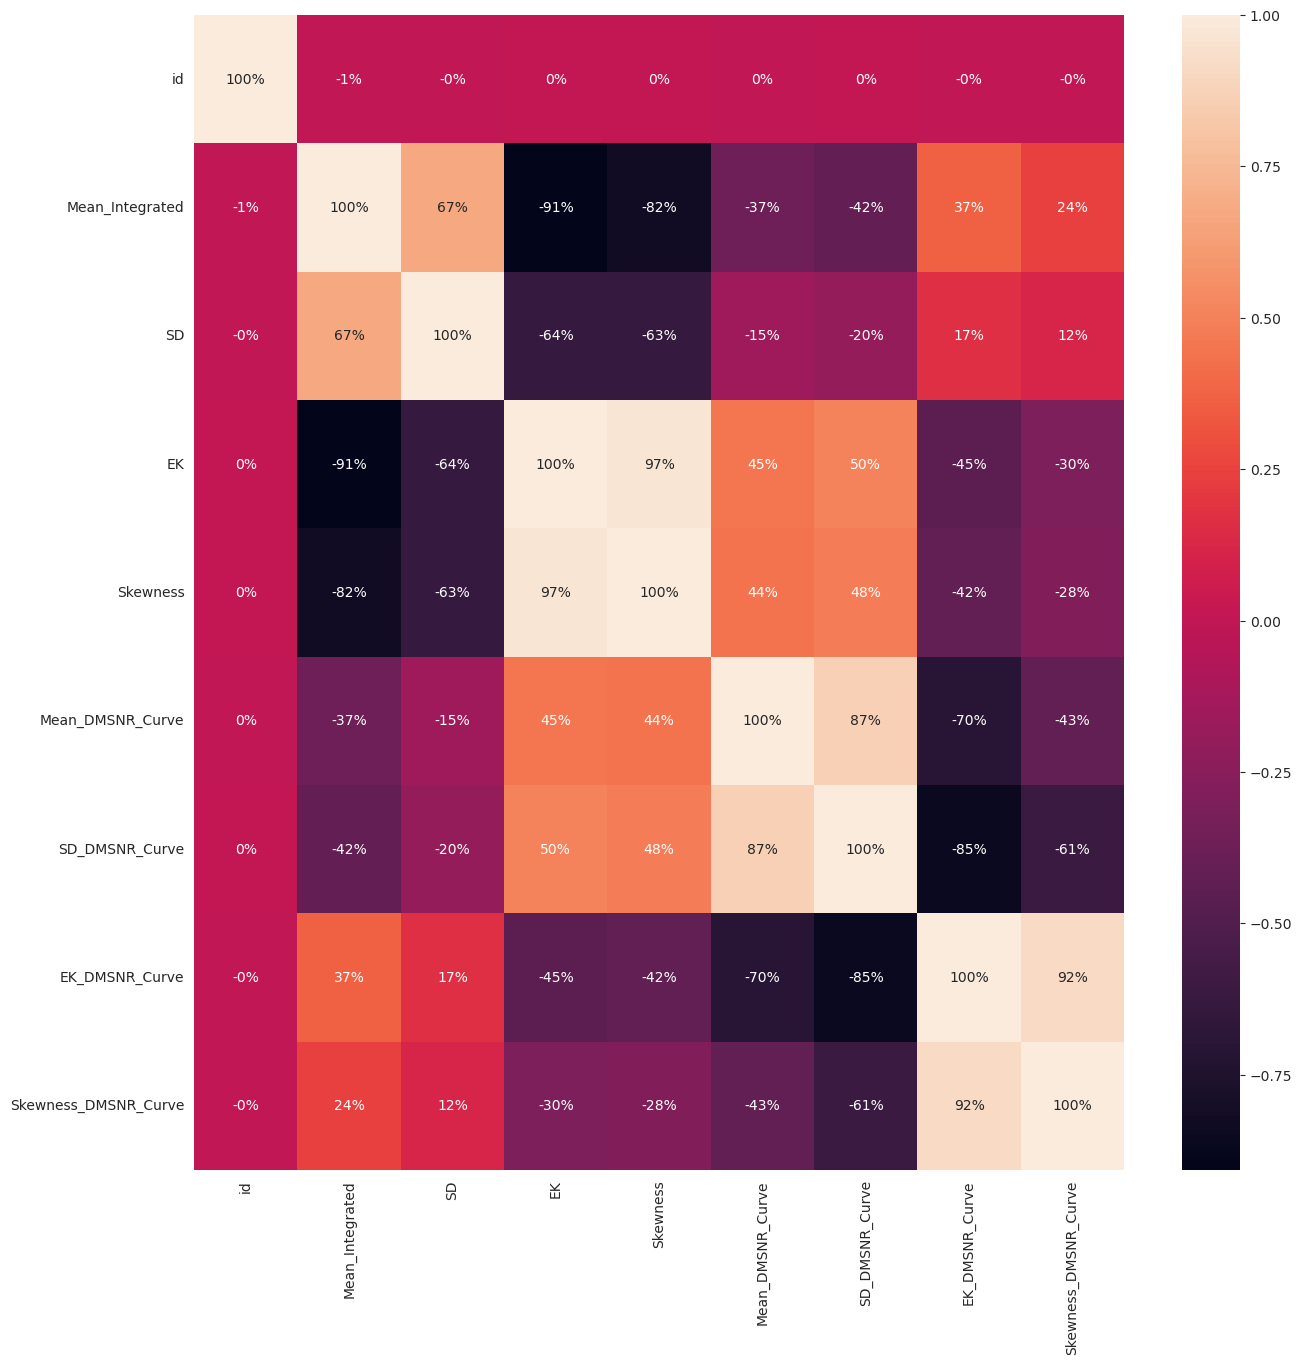

In [ ]:
#plot correlation matrix
plt.figure(figsize=(15,15))
sns.heatmap(train.iloc[:,0:9].corr(), annot=True, fmt='.0%');

#Conclusion

 "Like the energy from the gravitational collapse is not sufficient to produce the neutrons of a neutron star, so the collapse is halted by electron degeneracy to form white dwarfs. That creates an effective pressure which prevents further gravitational collapse, forming a neutron star. Even neutron degeneracy can't prevent further collapse and it continues toward the black hole state and so did this Kaggle Notebook".

![](https://images.squarespace-cdn.com/content/v1/5e284f5563e96b59f5f0e5d7/1590432547576-3JADPR5RXCSBT4ZOW932/PhotoByRuthMedjber-79.jpg)https://dublin.sciencegallery.com/latest/pulsars-little-green-men-and-joy-division-jocelyn-bell-burnells-story

#The discovery of a pulsar star and the Little Green Men (LGM)

"The discovery of a pulsar star first identified by Irish astrophysicist Professor Jocelyn Bell Burnell in 1967."

"During her PhD at Cambridge in the 1960s, Jocelyn accidentally discovered pulsars, also known as neutron stars - rapidly spinning dead stars in space. They are typically 10km to 15km in diameter and form from the compacting of a star’s core after a supernova.

"Pulsars are so dense with matter that the hypothetical equivalent on Earth would be squeezing the mass of Mount Everest into a single strand of hair. This extreme density means pulsars have a powerful magnetic field, a trillion times stronger than Earth’s.

"Jocelyn initially thought the unusual repeating signal described in the repetitive radio wave plot she obtained (seen on  the Joy Division album cover) was an abnormality and possibly caused by radio interference from local radio stations. For a short period, she even thought she had made contact with alien life. However, this idea of uncovering extra-terrestrial beings was short-lived as she unearthed more radio pulses from multiple locations in the sky. She decided to jokingly continue referencing the peaks of her famous radio readout as LGM, which stand for Little Green Men."

https://dublin.sciencegallery.com/latest/pulsars-little-green-men-and-joy-division-jocelyn-bell-burnells-story

#Acknowledgements:

Melek Inaç https://www.kaggle.com/code/melekna/pulsar-stars

Marina Shut https://www.kaggle.com/code/marshuu/svm-kernel-rbf-classification-salaries    